In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Armado de Dfs con columnas que me tocaron
df_original = pd.read_csv("./dataset/hotels_train.csv")
df = df_original.copy()

#Elimino 1 unico registro, donde el ADR resulta negativo
df.drop(df[(df['adr'] < 0)].index, inplace=True)

#Elimino variables que no me tocan analizar
columns_to_eliminate = (df.columns)[:21]
df.drop(columns = columns_to_eliminate, inplace = True)

#Elimino la variable reservation_status_date evitar confusiones o data leakage como indicaron desde la catedra
df.drop(columns=['reservation_status_date'], inplace = True)

#Elimino ID ya que no aporta valor al analisis al ser una variable ofuscada para mantener la privacidad
df.drop(columns = ['id'], inplace = True)

df_canceled = df[df.is_canceled == 1]
df_not_canceled = df[df.is_canceled == 0]

In [3]:
variables_cualitativas = ['deposit_type','agent','company','customer_type','is_canceled']

variables_cuantitativas = list(set(df.columns) - set(variables_cualitativas))

## Exploración inicial
### Variables

1. **deposit_type:** Esta variable cualitativa es de tipo alfanumérica y contendrá informacion sobre el tipo de reserva.
      Los posibles valores son:
    - *No Deposit:* No se realizo deposito. Aparece en 51685 (83.5%) de los registros.
    - *Non Refund:* Se realizo deposito por un valor igual o superior al valor de la reserva. Aparece en 10150 (16.4%) de los registros.
    - *Refundable:* Se realizo deposito por un valor menos al valor de la reserva. Aparece en 78 (0.13%) de los registros.

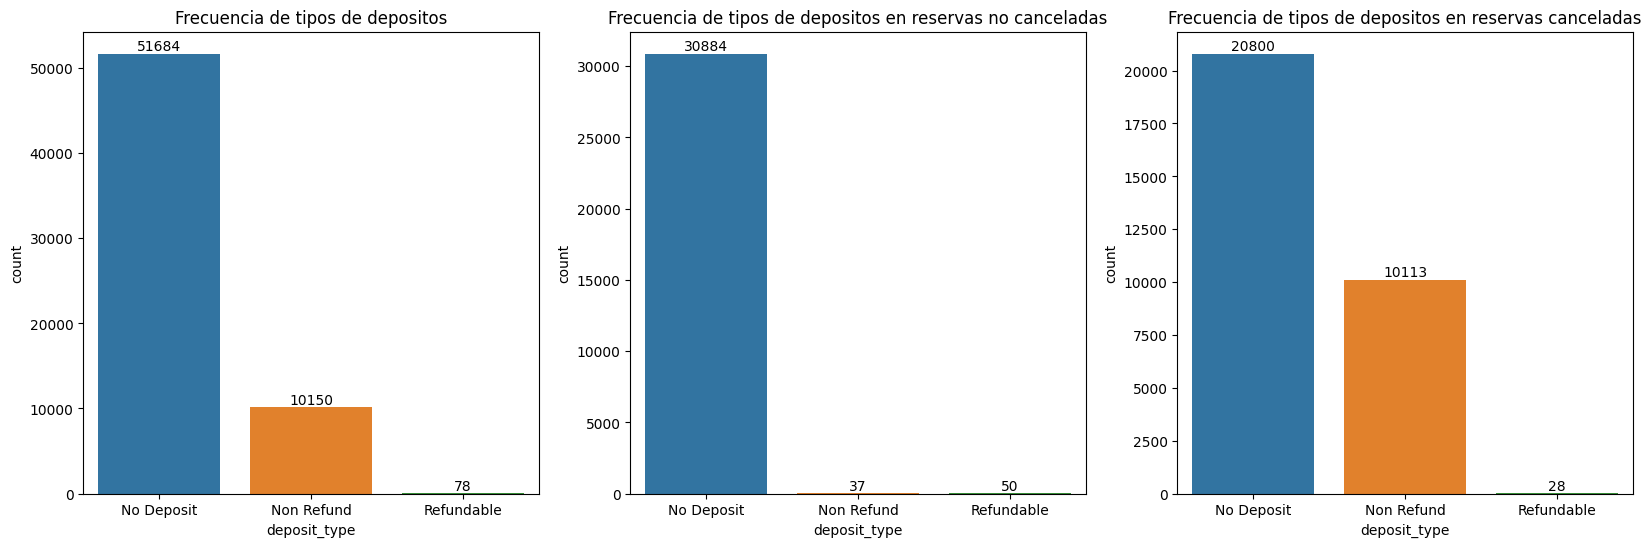

In [4]:
ig, ax = plt.subplots(1, 3, figsize = (20, 6))

sns00 = sns.countplot(data = df, x = "deposit_type", ax = ax[0])
for label in sns00.containers:
    sns00.bar_label(label)

sns01 = sns.countplot(data = df_not_canceled, x = "deposit_type", ax = ax[1])
for label in sns01.containers:
    sns01.bar_label(label)
    
sns02 = sns.countplot(data = df_canceled, x = "deposit_type", ax = ax[2])
for label in sns02.containers:
    sns02.bar_label(label)

ax[0].set_title('Frecuencia de tipos de depositos')
ax[1].set_title('Frecuencia de tipos de depositos en reservas no canceladas')
ax[2].set_title('Frecuencia de tipos de depositos en reservas canceladas')


plt.show()

Notamos que aquellas reservas que no tienen un deposito no son canceladas en un 59.7% mientras que las reservas que tiene un deposito por un valor igual o mayor al valor reserva son casi en su totalidad canceladas.
***

2. **agent:** Esta variable cualitativa es de tipo numerica y contendra informacion sobre el ID del agente de viajes (en caso 
    de que se uso uno) con el cual se realizo la reserva, sino fue utlizado un agente se describe esto mediante NULL.
    Los agentes mas utlizados son:
    - *9.0:* Aparece en 17004 (27.5%) de los registros.
    - *240:* Aparece en 7386 (12%) de los registros.
    - *1.0:* Aparece en 4424 (7.15%) de los registros.

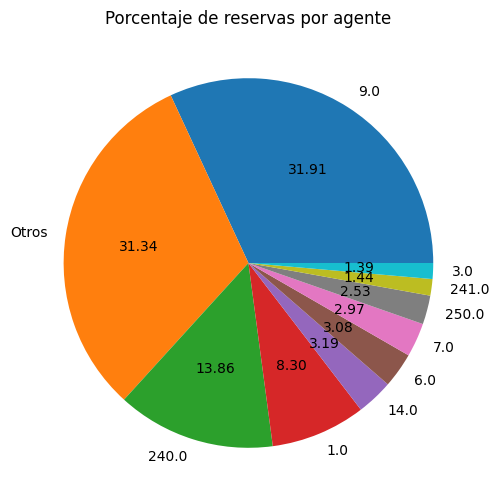

In [5]:
plt.figure(figsize = (10,6))
plt.title('Porcentaje de reservas por agente')

df_pie = df[df['agent'].isnull() == False] #dataframe sin Nan

todos_los_agentes = list(df_pie['agent'].value_counts().index)

a = pd.Series(np.where(df_pie['agent'].isin(todos_los_agentes[10:]), 'Otros' , df_pie['agent']))

values = list(a.value_counts())[:10]

labels = list(a.value_counts().index)[:10]

plt.pie(values, labels = labels, autopct='%.2f')

plt.show()

En total son 297 posibles valores los que toma esta variable incluyendo a NULL. En el grafico se muestran en que porcentaje se usaron los 10 agentes mas frecuentes, teniendo en cuenta solamente los registros donde un agente fue registrado.
***

3. **company:** Esta variable cualitativa es de tipo numerica y contendra informacion sobre el ID de la compañia (en caso 
    de que haya sido una) la cual realizo/ abono la reserva, si no fue realiada pur una compañia se describe esto mediante NULL.
    Las compañias que mas reservas realizaron son:
    - *40.0:* Aparece en 390 (0.63%) de los registros.
    - *223.0:* Aparece en 364 (0.59%) de los registros.
    - *67.0:* Aparece en 169 (0.27%) de los registros.

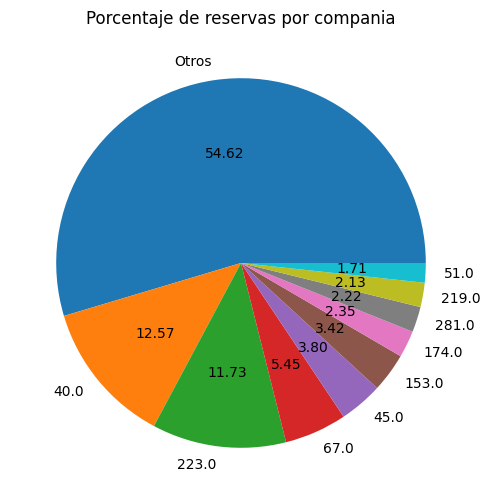

In [6]:
plt.figure(figsize = (10,6))
plt.title('Porcentaje de reservas por compania')

df_compania = df[df['company'].isnull() == False] #dataframe sin Nan

todas_las_companias = list(df_compania['company'].value_counts().index)

a = pd.Series(np.where(df_compania['company'].isin(todas_las_companias[10:]), 'Otros' , df_compania['company']))

values = list(a.value_counts())[:10]

labels = list(a.value_counts().index)[:10]

plt.pie(values, labels = labels, autopct='%.2f')

plt.show()

En total son 277 posibles valores los que toma esta variable incluyendo a NULL. En el grafico se muestran en que porcentaje se usaron las 10 companias mas frecuentes, teniendo en cuenta solamente los registros donde una compania fue registrada.
***

4. **days_in_waiting_list:** Esta variable cuantitativa de tipo numerica contendra informacion sobre los dias que estuvo en
    espera la reserva del cliente hasta que fue confirmada por parte del hotel. Sus analisis inicial:
    - *Moda:* 0.
    - *Media:* 2.6.
    - *Mediana:* 0.

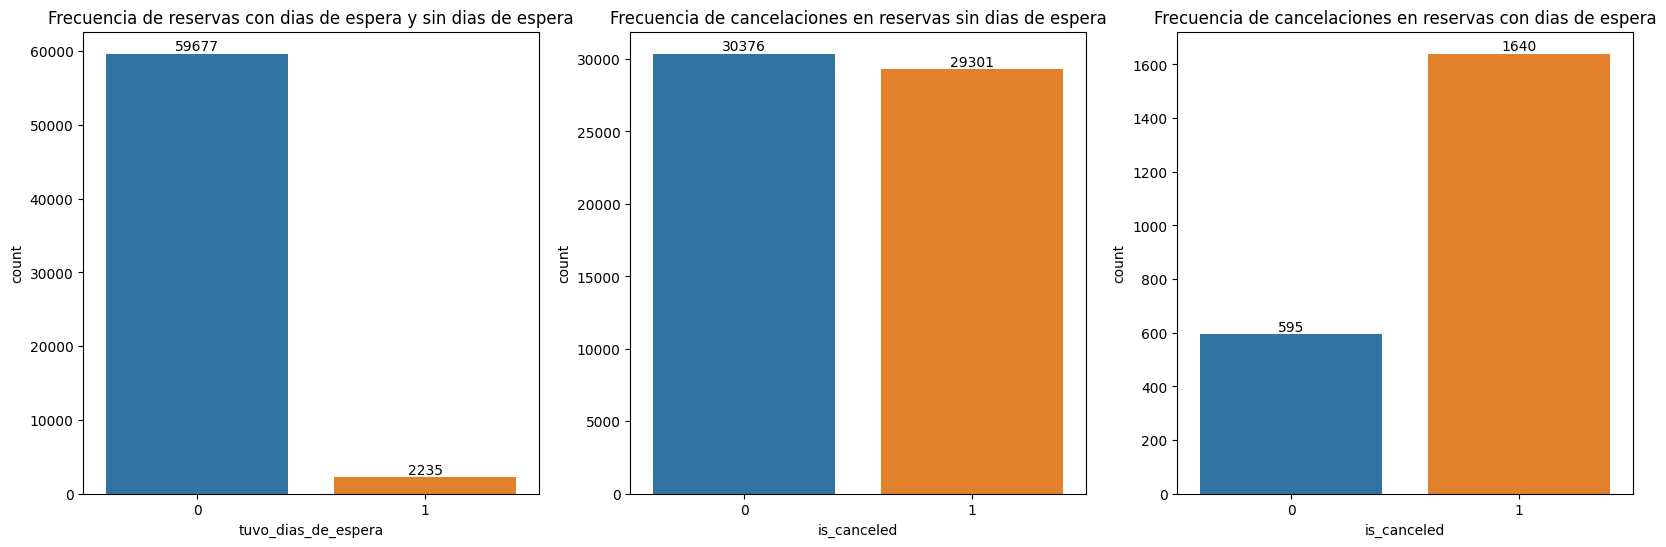

In [7]:
#Agrego nueva Columna 'tuvo_dias_de_espera' donde 1 si los tuvo, 0 si no los tuvo
df['tuvo_dias_de_espera'] = np.where(df['days_in_waiting_list'] != 0, 1 , 0)
df_sin_dias_de_espera = df[df['days_in_waiting_list'] == 0]
df_con_dias_de_espera = df[df['days_in_waiting_list'] != 0]

ig, ax = plt.subplots(1, 3, figsize = (20, 6))

sns00 = sns.countplot(data = df, x = "tuvo_dias_de_espera", ax= ax[0])
for label in sns00.containers:
    sns00.bar_label(label)

sns01 = sns.countplot(data = df_sin_dias_de_espera, x = "is_canceled", ax= ax[1])
for label in sns01.containers:
    sns01.bar_label(label)

sns02 = sns.countplot(data = df_con_dias_de_espera, x = "is_canceled", ax= ax[2])
for label in sns02.containers:
    sns02.bar_label(label)

ax[0].set_title('Frecuencia de reservas con dias de espera y sin dias de espera')
ax[1].set_title('Frecuencia de cancelaciones en reservas sin dias de espera')
ax[2].set_title('Frecuencia de cancelaciones en reservas con dias de espera')

plt.show()

No hubo dias de espera en 59677 registros (96%) y hubo 2235 (4%) donde si los hubo. Notamos que aquellas reservas que no tuvieron dias de espera, el porcentaje de reservas canceladas es aproximadamente el 50% por lo que esta variable no pareciera generar una mayor o menor cantidad de cancelaciones cuando no hubo dias de espera. Por otro lado notamos que en aquellas reservas donde si hubo dias de espera, el porcentaje de cancelaciones es del 60% por lo que si pareciera influir en las cancelaciones.

***

5. **customer_type:** Esta variable cualitativa es de tipo alfanumerica y contendra informacion sobre el tipo de reserva realizada
    contemplando 4 posibles categorias:
    - *Contract:* Indica que la reserva esta asociada a un paquete turistico. Aparece en 2033 (3.3%) de los registros.
    - *Group:* Indica que la reserva esta asociada a un grupo. Aparece en 263 (0.4%) de los registros.
    - *Transient:* Indica que no esta asociada a un paquete, un grupo u otra reserva. 
      Aparece en 47449 (76.6%) de los registros.
    - *Transient-party:* Indica que la reserva no esta asociada a un paquete o grupo, pero si a otra reserva transient. 
      Aparece en 12167 (19.7%) de los registros.

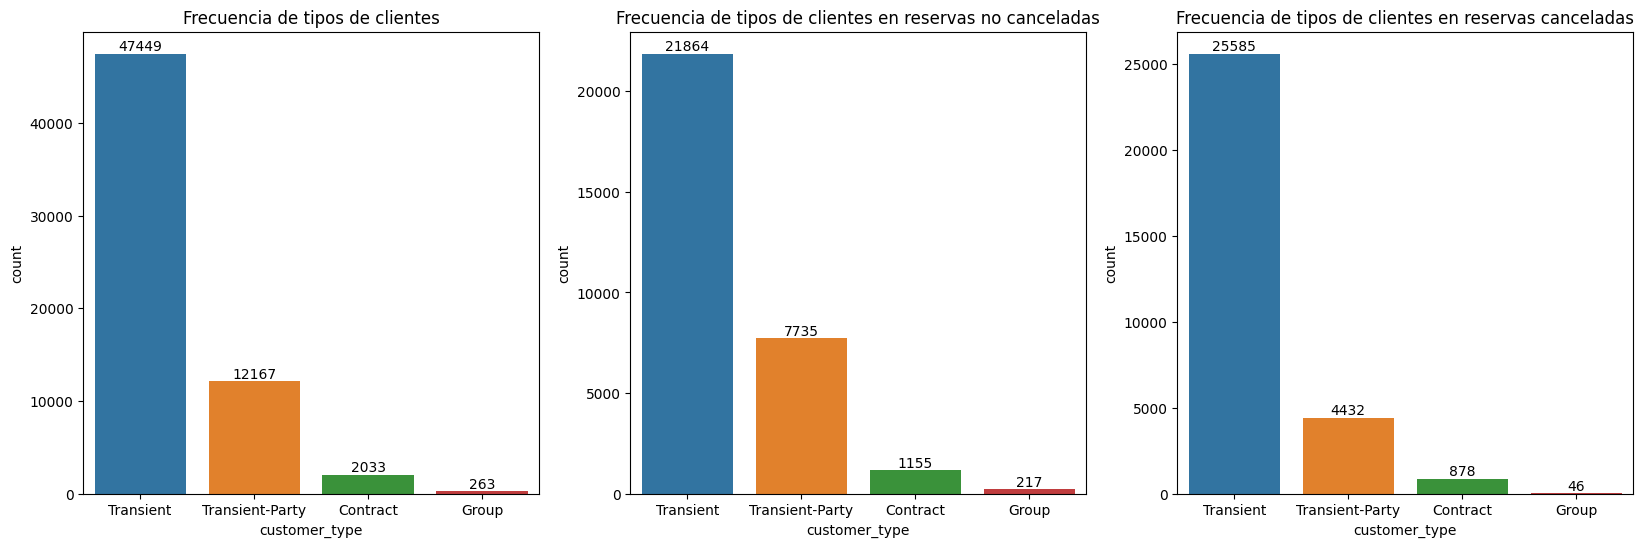

In [8]:
ig, ax = plt.subplots(1, 3, figsize = (20, 6))

sns00 = sns.countplot(data = df, x = "customer_type",ax= ax[0])
for label in sns00.containers:
    sns00.bar_label(label)

sns01 = sns.countplot(data = df_not_canceled, x = "customer_type",ax= ax[1])
for label in sns01.containers:
    sns01.bar_label(label)
    
sns02 = sns.countplot(data = df_canceled, x = "customer_type",ax= ax[2])
for label in sns02.containers:
    sns02.bar_label(label)

ax[0].set_title('Frecuencia de tipos de clientes')
ax[1].set_title('Frecuencia de tipos de clientes en reservas no canceladas')
ax[2].set_title('Frecuencia de tipos de clientes en reservas canceladas')

plt.show()

Comparando los graficos 'Frecuencia de tipos de clientes en reservas no canceladas' y 'Frecuencia de tipos de clientes en reservas canceladas' notamos que se cancelan en menor proporcion aquellas reservas que no tienen como tipo de cliente transient.
Para el caso de los clientes de tipo transient-party, de un total de 12167 no se cancelaron 7735 (63.6%) y se cancelaron solo 4432 (36.4%).
para el case de los clientes de tipo contract, de un total de 2033 no se cancelaron 1155 (56.8%) y se cancelaron solo 878 (43.2%).
Para el caso de los clientes de tipo group, de un total de 263 no se cancelaron 217 (82,5%) y se cancelaron solo 46 (17.5%).
***

6. **adr:** Esta variable cuantitativa de tipo numerica indica el valor promedio del dia de hospedaje calculado como el 
     importe total dividido por la cantidad de dias.  
    - *Moda:* 62.0.
    - *Media:* 102.3.
    - *Mediana:* 95.0.

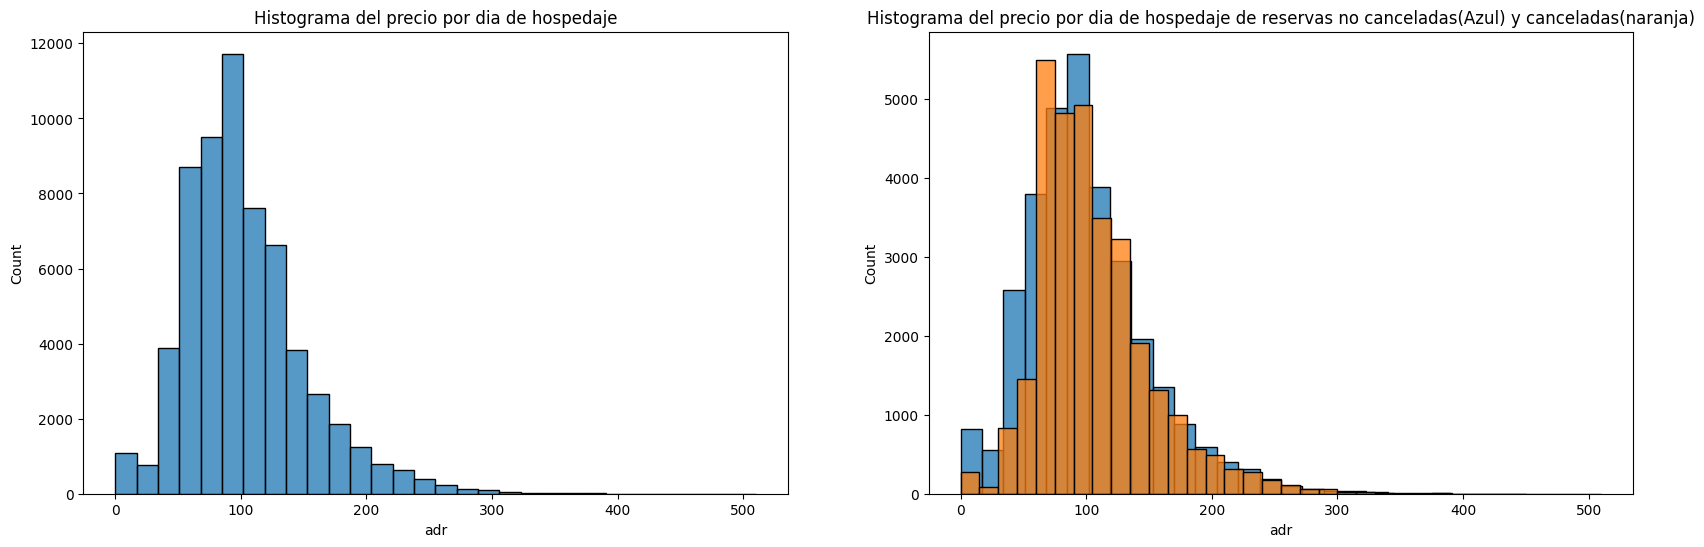

In [9]:
ig, ax = plt.subplots(1, 2, figsize = (20, 6))

sns.histplot(df, x = 'adr', ax = ax[0], bins = 30)
sns.histplot(df_not_canceled, x = 'adr', ax = ax[1], bins = 30)
sns.histplot(df_canceled, x = 'adr', ax = ax[1], bins = 30)

ax[0].set_title('Histograma del precio por dia de hospedaje')
ax[1].set_title('Histograma del precio por dia de hospedaje de reservas no canceladas(Azul) y canceladas(naranja)')

plt.show()

Notamos que aquellas reservas que fueron canceladas tienden a tener menores precios por dias de hospedaje que aquellas que no fueronn canceladas.Se elimino un valor atipico donde el ADR resulto negativo. 
***

7. **required_car_parking_spaces:** Esta variable cuantitativa indica la cantidad de espacios para autos reservados por el cliente 
    - *Moda:* 0.
    - *Media:* 0.05.
    - *Mediana:* 0.

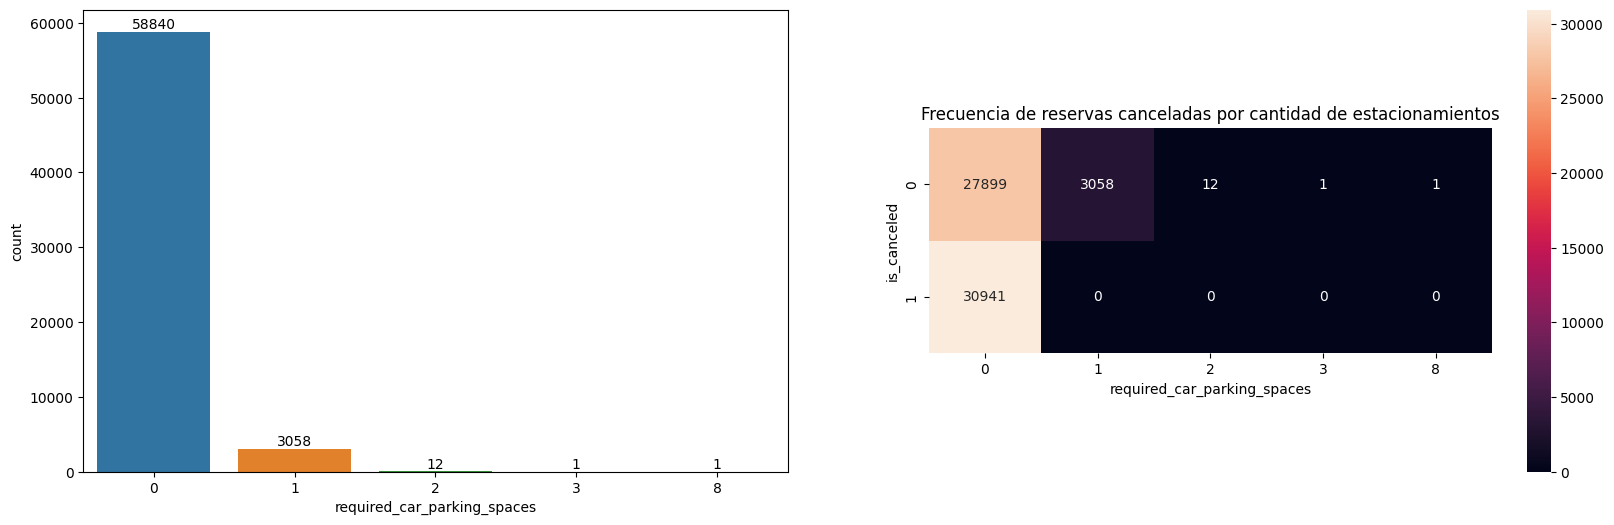

In [10]:
ig, ax = plt.subplots(1, 2, figsize = (20, 6))

sns00 = sns.countplot(data = df, x = 'required_car_parking_spaces', ax = ax[0])
for label in sns00.containers:
    sns00.bar_label(label)

tabla_estacionamientos = pd.crosstab(df['is_canceled'], df['required_car_parking_spaces'])
ax[1].set_title('Frecuencia de reservas canceladas por cantidad de estacionamientos')

sns.heatmap(tabla_estacionamientos, annot = True, square = True, ax = ax[1], fmt='g')

plt.show()

Notamos que ninguna de las reservas que fueron canceladas reservaron un lugar de estacionamiento.
***

8. **total_of_special_requests:** Esta variable de tipo cuantitativa indica la cantidad de pedidos adicionales realizados por el 
     cliente
    - *Moda:* 0.
    - *Media:* 0.5.
    - *Mediana:* 0.

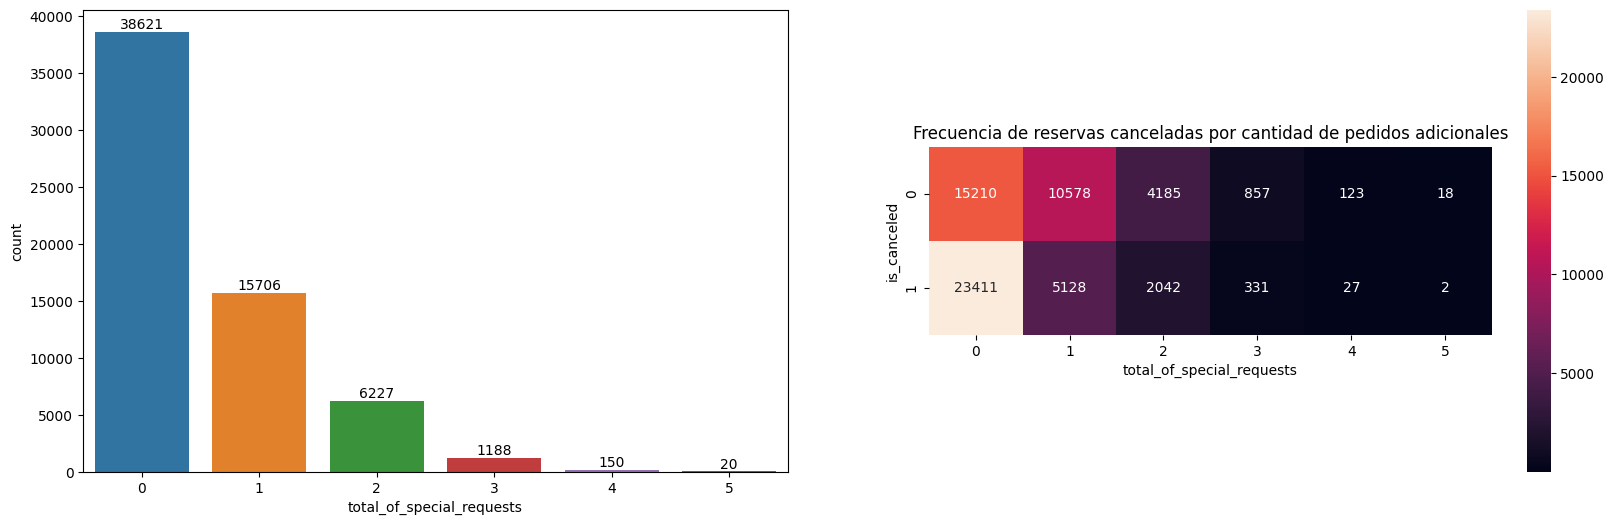

In [11]:
ig, ax = plt.subplots(1, 2, figsize = (20, 6))

sns00 = sns.countplot(data = df, x = 'total_of_special_requests', ax = ax[0])
for label in sns00.containers:
    sns00.bar_label(label)

tabla_adicionales = pd.crosstab(df['is_canceled'], df['total_of_special_requests'])
ax[1].set_title('Frecuencia de reservas canceladas por cantidad de pedidos adicionales')

sns.heatmap(tabla_adicionales, annot = True, square = True, ax = ax[1], fmt='g')

plt.show()

Notames que las reservas con mayor cantidad de pedidos especiales tienden a no ser canceladas en mayor proporcion.
Para las reservas con 1 pedido adicional, de un total de 15706 no se cancelaron 10578 (67.3%) y se cancelaron 2042 (32.6%).
Con 2 pedidos adicionales, de un total de 6227 no se cancelaron 4285 (67.2%) y se cancelaron 2042 (32.8%).
Con 3 pedidos adicionales, de un total de 1188 no se cancelaron 857 (72.1%) y se cancelaron 331 (27.9%).
Con 4 pedidos adicionales, de un total de 150 no se cancelaron 123 (82%.0) y se cancelaron 27 (18%).
Con 5 pedidos adicionales, de un total de 20 no se cancelaron 18 (95.0%) y se cancelaron 2 (5.0%).
Notamos tambien que a mayor cantidad de pedidos adicionales es mayor el porcentaje de reservas que no fueron canceladas.
***

9. **is_canceled:** Esta variable binaria indica si la reserva fue cancelada (1) o no (0).
    - *0:* No cancelada. Aparece en 30972 (50%) de los registros.
    - *1:* Cancelada. Aparece en 30941 (50%) de los registros.

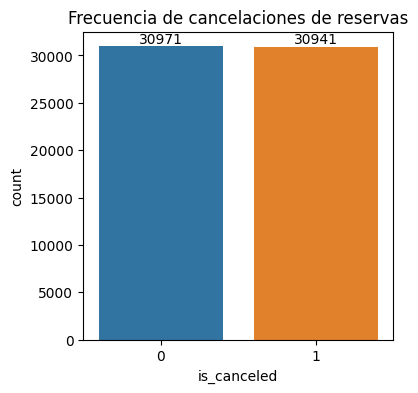

In [12]:
ig, ax = plt.subplots(1, 1, figsize = (4, 4))

a = sns.countplot(data = df, x = "is_canceled", ax = ax)
for label in a.containers:
    a.bar_label(label)

ax.set_title('Frecuencia de cancelaciones de reservas')

plt.show()

Notamos que estan canceladas aproximadamente el 50% de las reservas.